<b>Note: </b>The following results have been obtained taking n = 100 as the input.

In [64]:
# Importing required modules
import matplotlib.pyplot as plt
import numpy as np

# For inline plotting of matplotlib plots
%matplotlib inline


### Task 0

We create a function that takes n as input and runs a 1D random walk for n timesteps, and gives us the coordinates of the point at all timesteps. We then plot the graph of x vs. t.

In [65]:
# Simulating a 1D random walk
def random_walk(n):
    coordinates = [0]
    position = 0

    # We run the process n times. Each time we generate either 0 or 1 randomly.
    # 0 is left, 1 is right. We then store the coordinates after the moves made
    # in the coordinates list (assuming an initial starting point of 0).
    for i in range(n):
        direction = np.random.choice([0, 1])
        if direction == 0:
            position -= 1
        else:
            position += 1

        coordinates.append(position)

    return coordinates


In [66]:
# Taking input from the user
n = int(input("Enter value of n: "))

# Verifying the input
print(n)


100


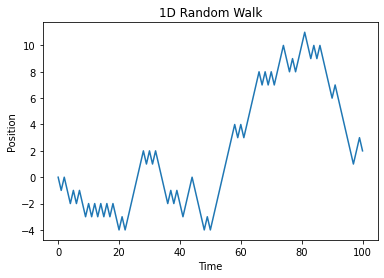

In [67]:
# Here, we make the assumption that each step takes 1 unit of time.
coordinates = np.array(random_walk(n))
times = np.array([i for i in np.arange(len(coordinates))])

# Plotting the graph of x vs. t
plt.plot(times, coordinates)
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("1D Random Walk")
plt.show()


### Task 1

The following is our scenario:

Two drunks start out together at the origin, each having equal probability of making a step to the left or right along the X-axis. They make their steps simultaneously. Our task is to find the probability that they will meet again after n steps.

First, we find the probability that they meet again after n timesteps by running the simulation multiple times and plot the probability for different values of n.


In [68]:
probabilities = []

# Iterating though all values of n from 1 to n
for i in range(1, n + 1):
    number_of_times_met = 0

    # We run the random walk 1000 times to find the probability of meeting
    for j in range(1000):
        # Obtaining the coordinates of the random walk for the 2 drunks
        drunk_1_coordinates = random_walk(i)
        drunk_2_coordinates = random_walk(i)

        # Checking if the two drunks are at the same position at the end
        if drunk_1_coordinates[-1] == drunk_2_coordinates[-1]:
            number_of_times_met += 1

    # Calculating the probability of the two drunks meeting
    probability = number_of_times_met / 1000
    probabilities.append(probability)


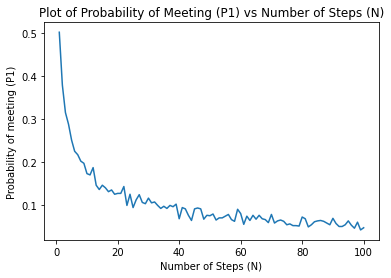

In [69]:
# Plotting the graph of probability of meeting vs. n
plt.plot(np.array(range(1, n + 1)), np.array(probabilities))
plt.xlabel("Number of Steps (N)")
plt.ylabel("Probability of meeting (P1)")
plt.title("Plot of Probability of Meeting (P1) vs Number of Steps (N)")
plt.show()

Next, we simulate the random walk of a single drunk person and find the probability that he/she returns back to the origin after n timesteps, and plot the probabilities for different values of n.

In [70]:
probabilities_of_origin = []
mean_displacements = []
mean_squared_displacements = []

# Iterating though all values of n from 1 to 1000
for i in range(1, n + 1):
    number_of_times_at_origin = 0
    displacements = []

    # We run the random walk 1000 times to find the probability of reaching the origin
    for j in range(1000):
        # Obtaining the coordinates of the random walk for the drunk
        drunk_coordinates = random_walk(i)

        # Obtaining end displacement of the drunk
        displacement = drunk_coordinates[-1]
        displacements.append(displacement)

        # Checking if the drunk is at the origin
        if drunk_coordinates[-1] == 0:
            number_of_times_at_origin += 1

    # Calculating the mean displacement and mean squared displacement of the drunk
    mean_displacement = np.mean(np.array(displacements))
    mean_squared_displacement = np.mean(np.square(np.array(displacements)))
    mean_displacements.append(mean_displacement)
    mean_squared_displacements.append(mean_squared_displacement)

    # Calculating the probability of the drunk reaching the origin
    probability = number_of_times_at_origin / 1000
    probabilities_of_origin.append(probability)


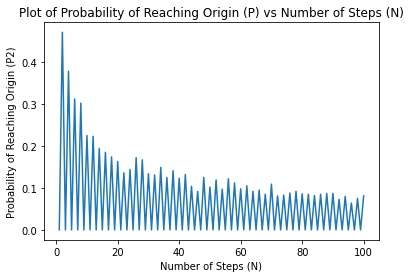

In [71]:
# Plotting the graph of probability of reaching origin vs. n
plt.plot(np.array(range(1, n + 1)), np.array(probabilities_of_origin))
plt.xlabel("Number of Steps (N)")
plt.ylabel("Probability of Reaching Origin (P2)")
plt.title("Plot of Probability of Reaching Origin (P) vs Number of Steps (N)")
plt.show()

Finally, we find the Mean Displacement and Mean Squared Displacement for the drunk after n steps. We have already obtained the mean and mean squared displacements for the drunk in the previous task. We plot the Mean Displacement vs. n and Mean Squared Displacement vs. n.

Mean Displacement:  0.432
Mean Squared Displacement:  97.432


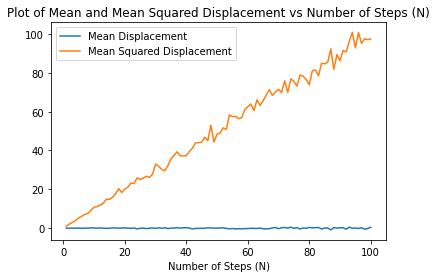

In [72]:
# Printing the mean and mean squared displacement of the drunk after n steps
print("Mean Displacement: ", mean_displacements[-1])
print("Mean Squared Displacement: ", mean_squared_displacements[-1])

# Plotting the graphs of mean displacement vs. n and mean squared displacement vs. n
plt.plot(np.array(range(1, n + 1)), np.array(mean_displacements), label="Mean Displacement")
plt.plot(np.array(range(1, n + 1)), np.array(mean_squared_displacements), label="Mean Squared Displacement")
plt.xlabel("Number of Steps (N)")
plt.title("Plot of Mean and Mean Squared Displacement vs Number of Steps (N)")
plt.legend()
plt.show()

### Task 2

In this task, we run a Monte Carlo simulation to calculate the value of pi. A Monte Carlo simulation relies on repeated sampling to obtain numerical results, thus using randomness to solve deterministic problems.

The following is our scenario:

We are given n point pebbles. We also have a unit circle and a unit square. We must simulate an experiment to find the value of pi using these inputs.

The idea is to throw the pebbles at the unit circle and count the number of times the pebbles land inside the circle. We consider 4 quadrants, and suppose that each quadrant is enclosed by a unit square. On repeated sampling, we can see that the probability of landing inside the quadrant is equal to the number of times the pebbles land inside the circle divided by the total number of pebbles thrown. But for large n, since the points are random, we can take them to give us the areas of the quadrant and the unit square. i.e. the probability of landing inside the circle is equal to the area of the quadrant divided by the area of the unit square.

Therefore, we have the following formula:

```
(pi * r^2) / 4 = (number of points inside the circle) / (total number of points thrown)
```

Given that r = 1, we have the following formula:

```
pi = (number of points inside the circle) / (total number of points thrown)
```

In [73]:
# Taking input from the user
n = int(input("Enter value of n: "))

# Verifying the input
print(n)


100


In [76]:
pi_array = []

for i in range(1, n + 1):
    number_of_times_landed_in_circle = 0

    for j in range(i):
        # Generating a set of random coordinates, such that both x and y are between 0 and 1
        # (x,y) is the landing point of the pebble. We are simulating a random throw of a pebble
        # in the unit square and checking if it lands in the unit circle.
        x = np.random.random()
        y = np.random.random()

        # If the pebble lands in the circle (its landing point is inside the circle)
        if x ** 2 + y ** 2 <= 1:
            number_of_times_landed_in_circle += 1

    # Calculating and storing the value of pi. Here, we divide by i because all of the
    # pebbles will surely land inside the unit square.
    pi = (4 * number_of_times_landed_in_circle) / i
    pi_array.append(pi)


Value of pi:  3.12


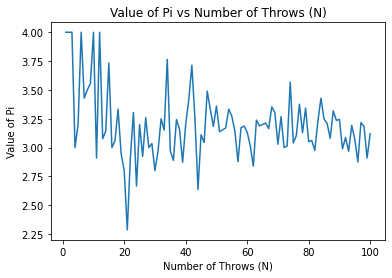

In [77]:
# Obtaining the value of pi after n iterations
print("Value of pi: ", pi_array[-1])

# Plotting the graph of pi vs. n
plt.plot(np.array(range(1, n + 1)), np.array(pi_array))
plt.xlabel("Number of Throws (N)")
plt.ylabel("Value of Pi")
plt.title("Value of Pi vs Number of Throws (N)")
plt.show()